In [ ]:
#import kaggle
#!kaggle datasets download octopusteam/imdb-top-1000-movies -f data.csvimport numpy as np


Data pre-processing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv',na_values=['Not Available','unknown'])

Exploratory Data Analysis

In [5]:
df.shape

(1000, 6)

In [6]:
df.columns

Index(['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [8]:
print(df.duplicated().sum())

0


In [9]:
df

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,2954554,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2059785,1972
2,tt0252487,The Chaos Class,Comedy,9.2,43616,1975
3,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.2,15452,1993
4,tt16747572,The Silence of Swastika,"Documentary, History",9.1,10569,2021
...,...,...,...,...,...,...
995,tt0414387,Pride & Prejudice,"Drama, Romance",7.8,339552,2005
996,tt0472043,Apocalypto,"Action, Adventure, Drama",7.8,336802,2006
997,tt0094226,The Untouchables,"Crime, Drama, Thriller",7.8,336479,1987
998,tt5726616,Call Me by Your Name,"Drama, Romance",7.8,326969,2017


In [10]:
df[['genres']]

,genres
0,Drama
1,"Crime, Drama"
2,Comedy
3,"Action, Adventure, Animation"
4,"Documentary, History"
...,...
995,"Drama, Romance"
996,"Action, Adventure, Drama"
997,"Crime, Drama, Thriller"
998,"Drama, Romance"


In [11]:
df['genres'].nunique()

212

In [12]:
df['releaseYear'].unique()

array([1994, 1972, 1975, 1993, 2021, 2008, 2003, 1974, 1957, 2001, 2016,
       1976, 2010, 1999, 2002, 1966, 2023, 1982, 1984, 2011, 2014, 1980,
       1990, 2020, 2022, 1987, 2018, 1977, 1978, 2006, 1985, 1995, 1991,
       1998, 1997, 1946, 1954, 1962, 2005, 1996, 2000, 1973, 2012, 2019,
       1979, 1960, 1942, 2024, 1968, 1988, 1936, 1931, 1992, 1964, 2009,
       1981, 1986, 2017, 1940, 1950, 1963, 2004, 2015, 1959, 1965, 1983,
       1941, 1958, 1952, 2007, 1927, 1948, 1944, 1961, 2013, 1929, 1945,
       1969, 1967, 1971, 1989, 1939, 1921, 1924, 1955, 1956, 1949, 1932,
       1925, 1934, 1926, 1953, 1930, 1928, 1951, 1937, 1923, 1970, 1943,
       1920, 1947, 1933, 1938], dtype=int64)

In [13]:
df.describe()

,averageRating,numVotes,releaseYear
count,1000.000000,1.000000e+03,1000.000000
mean,8.134500,2.773330e+05,1992.249000
std,0.252514,4.275929e+05,25.619394
min,7.800000,1.014400e+04,1920.000000
25%,7.900000,2.249375e+04,1974.750000
50%,8.100000,6.720700e+04,2001.000000
75%,8.200000,3.807382e+05,2014.000000
max,9.300000,2.954554e+06,2024.000000


In [14]:
rating_stats=df['averageRating'].describe()
print(rating_stats)

count    1000.000000
mean        8.134500
std         0.252514
min         7.800000
25%         7.900000
50%         8.100000
75%         8.200000
max         9.300000
Name: averageRating, dtype: float64


DATA VISUALIZATION

Questions answered :

1.Top 10 movies based on ratings

2.Average number of votes based on ratings


3.Movies count for each genre


4.Top 10 Most Frequent Genres based on Average Ratings by Year Group

5.Average number of votes by Genre

6.Top 10 Genres with most votes

7.Average Rating by Genre per Years

8.Evolution of number of votes over the year

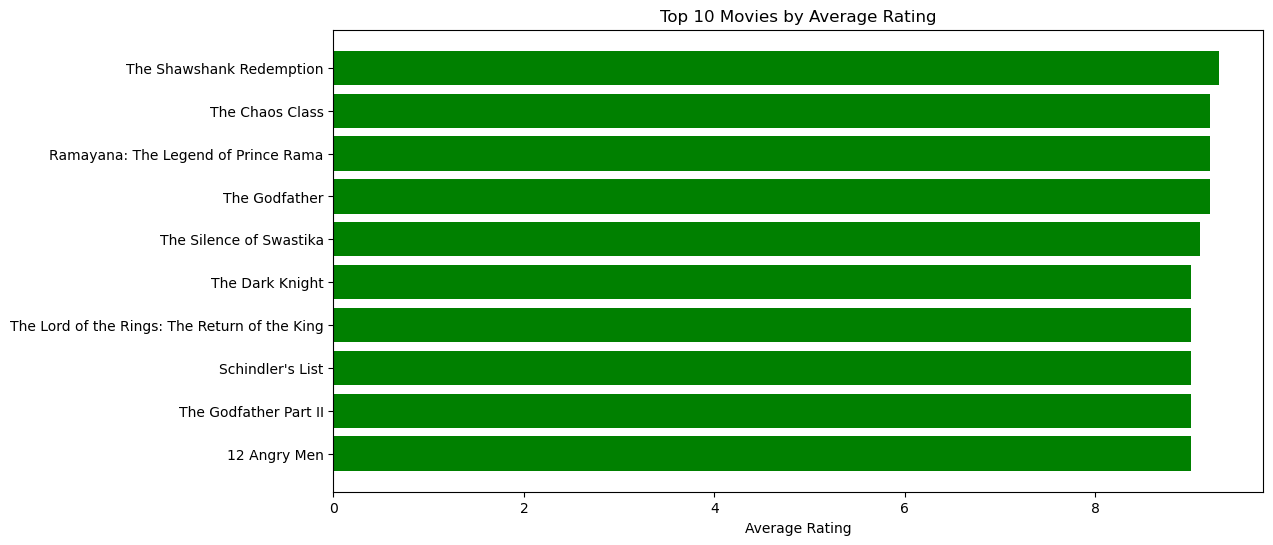

In [16]:
top_movies = df.sort_values(by="averageRating", ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.barh(top_movies['title'], top_movies['averageRating'], color='green')
plt.xlabel("Average Rating")
plt.title("Top 10 Movies by Average Rating")
plt.gca().invert_yaxis();

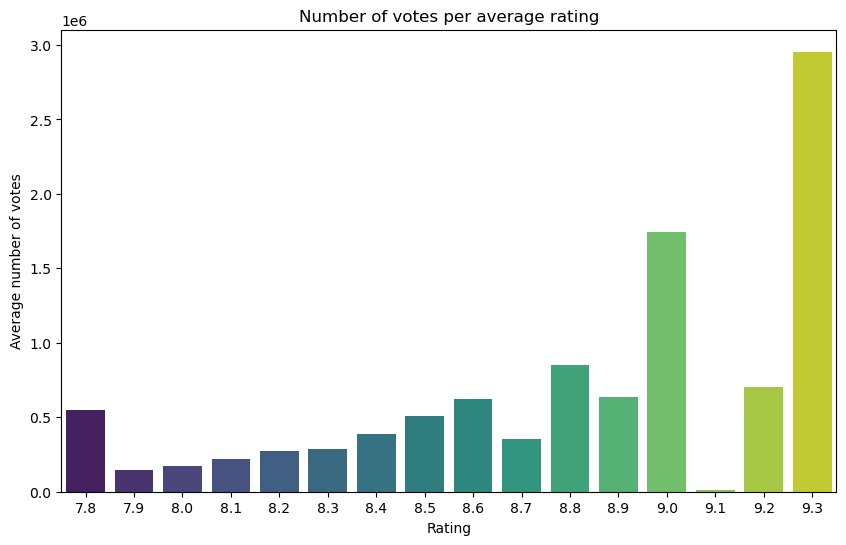

In [17]:
avg_votes = df.groupby('averageRating')['numVotes'].mean()

plt.figure(figsize=(10, 6))

sns.barplot(x=avg_votes.index, y=avg_votes.values, palette='viridis')

plt.title("Number of votes per average rating")
plt.xlabel("Rating")
plt.ylabel("Average number of votes")

plt.show()

In [21]:
genres = df['genres'].str.count(',')
print(genres[genres.values > 2])

Series([], Name: genres, dtype: int64)


In [22]:
df['genres_splited'] = df['genres'].str.split(',')
df_exploded = df.explode('genres_splited')

df_exploded['genres_splited'] = df_exploded['genres_splited'].str.strip()

genre_counts = df_exploded['genres_splited'].value_counts()
print(genre_counts[:10])

average_rating_per_genre = df_exploded.groupby('genres_splited')['averageRating'].mean().sort_values(ascending=False)
print("\nAvg rating by genre:")
print(average_rating_per_genre)

df_exploded['year_group'] = (df_exploded['releaseYear'] // 10) * 10

average_rating_per_year_genre = df_exploded.groupby(['year_group', 'genres_splited'])['averageRating'].mean().unstack()

genres_splited
Drama          723
Crime          218
Comedy         214
Action         195
Adventure      148
Romance        133
Thriller       121
Biography      112
Documentary     86
Mystery         79
Name: count, dtype: int64

Avg rating by genre:
genres_splited
News           8.200000
War            8.184746
Animation      8.172881
Western        8.157143
History        8.150980
Adventure      8.147297
Mystery        8.143038
Action         8.142564
Family         8.141860
Comedy         8.141589
Documentary    8.139535
Crime          8.137615
Biography      8.133036
Musical        8.130769
Drama          8.128907
Sci-Fi         8.124000
Sport          8.124000
Music          8.123529
Fantasy        8.110000
Thriller       8.098347
Romance        8.095489
Horror         8.091304
Film-Noir      7.990909
Name: averageRating, dtype: float64


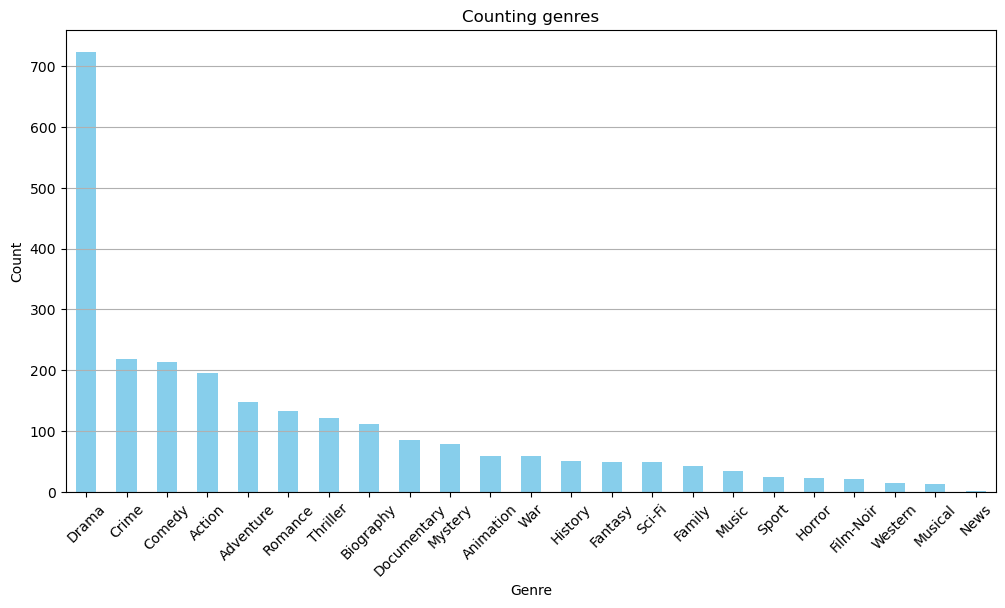

In [23]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Counting genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [24]:
!pip install -q plotly

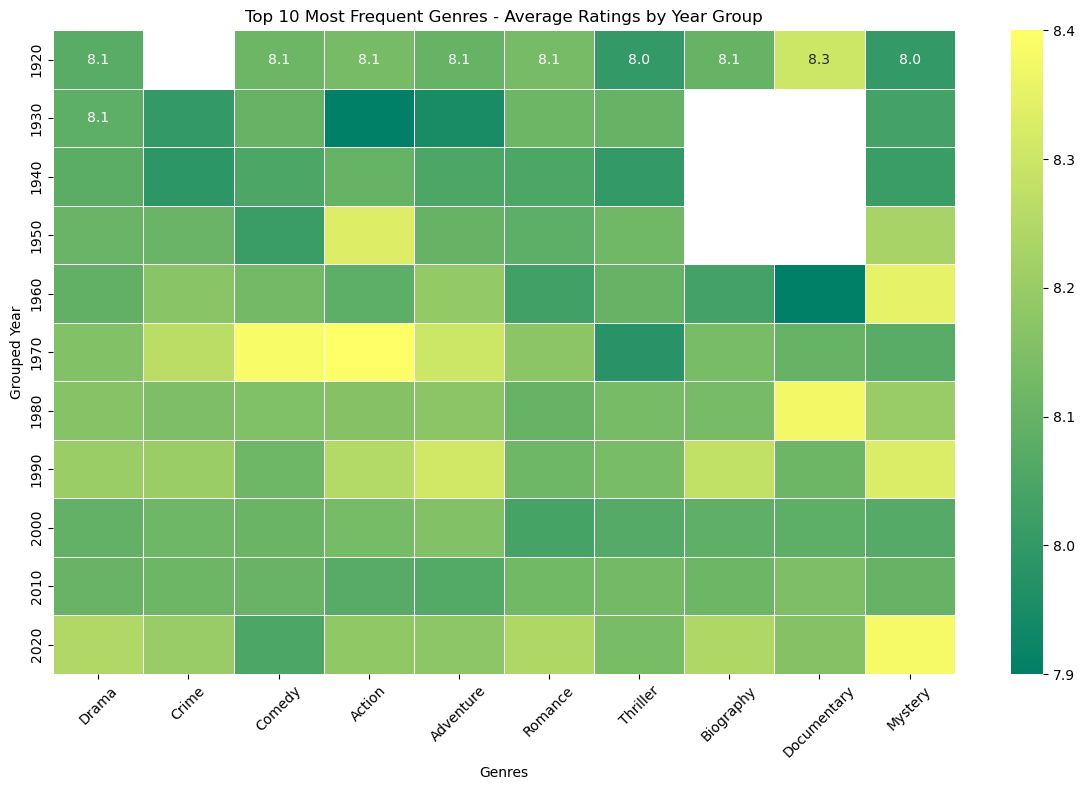

In [33]:
top_genres = genre_counts.index[:10]  

average_rating_per_year_genre_top = average_rating_per_year_genre[top_genres]

plt.figure(figsize=(12, 8))
sns.heatmap(average_rating_per_year_genre_top, annot=True, cmap='summer', fmt='.1f', linewidths=.5)
plt.title('Top 10 Most Frequent Genres - Average Ratings by Year Group')
plt.xlabel('Genres')
plt.ylabel('Grouped Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

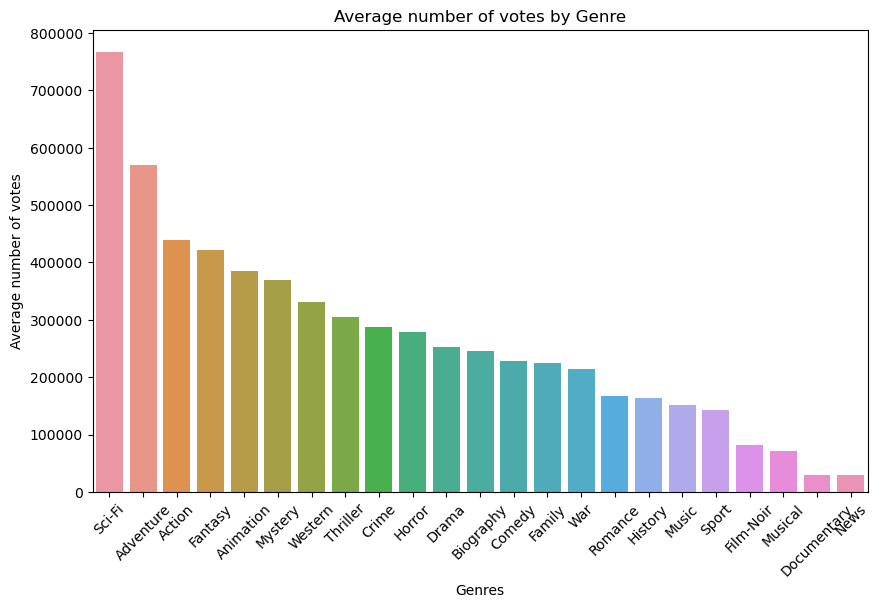

In [26]:
avg_votes_per_genre = df_exploded.groupby('genres_splited')['numVotes'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_votes_per_genre.index, y=avg_votes_per_genre.values)
plt.title('Average number of votes by Genre')
plt.xlabel('Genres')
plt.ylabel('Average number of votes')
plt.xticks(rotation=45)
plt.show()

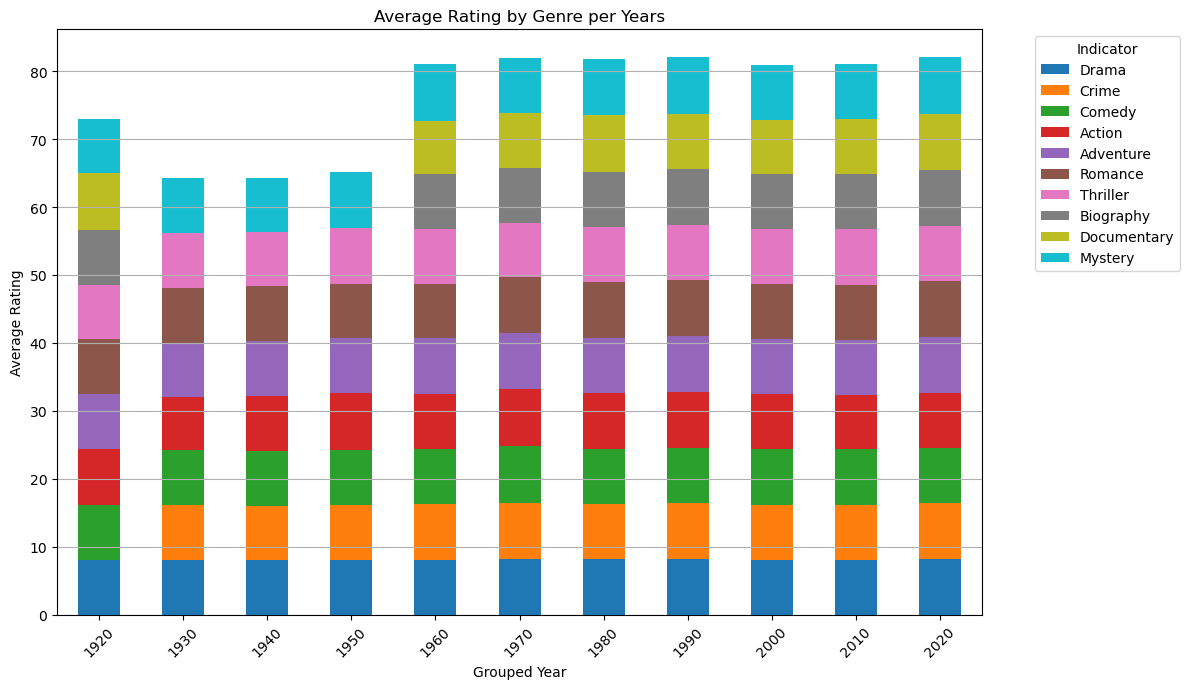

In [34]:
average_rating_per_year_genre = average_rating_per_year_genre[top_genres]

ax = average_rating_per_year_genre.plot(kind='bar', stacked=True, figsize=(12,7))

plt.title('Average Rating by Genre per Years')
plt.xlabel('Grouped Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

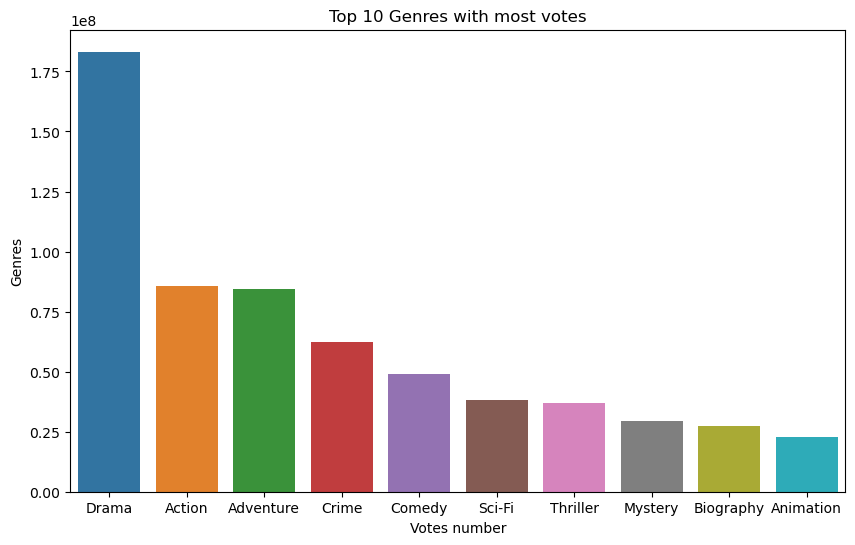

In [29]:
top_genres_by_votes = df_exploded.groupby('genres_splited')['numVotes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres_by_votes.values, x=top_genres_by_votes.index)
plt.title('Top 10 Genres with most votes')
plt.xlabel('Votes number')
plt.ylabel('Genres')
plt.show()

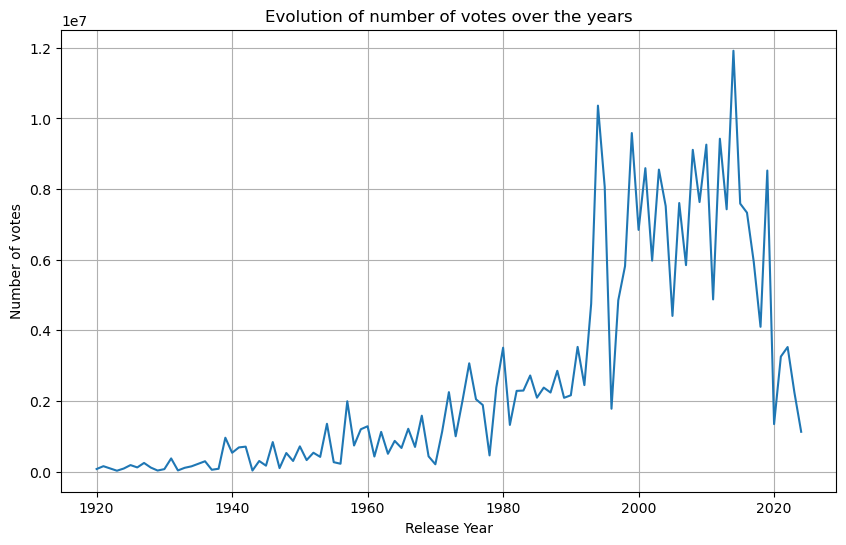

In [30]:
votes_per_year = df.groupby('releaseYear')['numVotes'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=votes_per_year.index, y=votes_per_year.values)
plt.title('Evolution of number of votes over the years')
plt.xlabel('Release Year')
plt.ylabel('Number of votes')
plt.grid(True)
plt.show()